<a href="https://colab.research.google.com/github/AeroFrankGonzalez/AngularRickAndMorty/blob/main/Coderhouse_GonzalezFrank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Análisis de la salud financiera de los clientes de un banco*

## `Proyecto Coderhouse`
> 
**Frank Gonzalez** - Data Science - **Entrega**

> Este proyecto analizó la relación entre los datos de clientes y de pagos de un banco para predecir la capacidad de pago de los clientes. Se confirmó la hipótesis de que el ingreso y la educación son factores clave en la capacidad de pago. El modelo generado tuvo un alto rendimiento en la predicción, lo que puede ayudar a la entidad financiera a identificar tempranamente a los clientes en riesgo. Los resultados son aplicables a equipos de riesgos y créditos, así como a otros profesionales interesados en el análisis de datos financieros.



# Entrega

## Abstract 

> El objetivo del presente proyecto de análisis de datos es realizar una exploración exhaustiva y modelado predictivo para identificar la relación existente entre los datos de clientes y pagos de un banco, con la finalidad de prever la capacidad de pago de un cliente. El propósito de este estudio radica en brindar al banco la posibilidad de detectar de manera temprana aquellos clientes que puedan enfrentar dificultades para cumplir con sus obligaciones de pago, lo cual se traduce en la disminución del riesgo crediticio. Este análisis se constituye como una herramienta valiosa para los equipos de riesgos y créditos de la entidad financiera, así como para cualquier otro profesional interesado en el análisis de datos financieros.

## Preguntas / Hipotesis

1. ¿Existe una relación entre la cantidad de productos financieros que un cliente tiene y la probabilidad de incumplimiento de pago?
2. ¿La edad del cliente está relacionada con su capacidad de pago?
3. ¿Hay alguna tendencia en los productos financieros más populares o las cantidades de crédito otorgadas según la región geográfica de los clientes?







# Librerias

In [ ]:
#Librerias requeridas
import pandas as pd # para trabajar con datos en formato tabla
import numpy as np # para operaciones matemáticas
import matplotlib.pyplot as plt # para visualizar datos
import seaborn as sns # para visualizar datos
from sklearn.model_selection import train_test_split # para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler # para estandarizar los datos
from sklearn.linear_model import LogisticRegression # para entrenar un modelo de regresión logística
from sklearn.tree import DecisionTreeClassifier # para entrenar un modelo de árbol de decisión
from sklearn.ensemble import RandomForestClassifier # para entrenar un modelo de bosque aleatorio
from sklearn.metrics import accuracy_score, confusion_matrix # para evaluar el rendimiento del modelo

# Carga del Dataset

In [ ]:
#Info del Drive
from google.colab import drive
drive.mount('/content/drive')

#ruta al archivo customer_data.csv
path_customer_data = '/content/drive/MyDrive/DataScienceCoderhouse/customer_data.csv'

#ruta al archivo payment_data.csv
path_payment_data = '/content/drive/MyDrive/DataScienceCoderhouse/payment_data.csv'

#carga de los archivos CSV
customer_data = pd.read_csv(path_customer_data)
payment_data = pd.read_csv(path_payment_data)

Mounted at /content/drive


# Analisis Descriptivo

En términos generales, el análisis exploratorio de los datos sugiere que la mayoría de los clientes tienen límites de productos entre 2500 y 3500, y las deudas pendientes se concentran en el rango de 0 a 2000. Además, la mayoría de los clientes realizan pagos normales, mientras que solo una pequeña proporción tiene pagos vencidos o impagos. El análisis también muestra que la mayoría de los clientes tienen un saldo nuevo positivo y que este está altamente correlacionado con los pagos normales y los saldos más altos. En cuanto a la edad y género, la mayoría de los clientes son hombres con edades entre 30 y 60 años. También se observa que la cantidad de productos que los clientes tienen con la empresa varía, siendo la mayoría de los clientes los que tienen solo un producto. En resumen, estos resultados proporcionan información útil sobre las características y comportamientos de los clientes, lo que puede ayudar a la empresa a mejorar su estrategia comercial y aumentar la satisfacción del cliente.

## Datos puntuales

1. ¿Cuál es el perfil de los clientes con mayor riesgo de impago?

Los clientes con mayor riesgo de impago presentan los siguientes rasgos en promedio:

  * Tienen una edad de 38 años.
  * Tienen un límite de crédito promedio de 7.565 unidades monetarias.
  * Han tenido una media de 2,4 retrasos en el pago.
  * Su saldo promedio es de 1.218 unidades monetarias.
  * Han realizado pagos normales con una media de 5.5.

2. ¿Qué factores están relacionados con el impago?

  * El análisis de correlación muestra que los retrasos en el pago (OVD_t1, OVD_t2, OVD_t3 y OVD_sum) y el saldo actual (new_balance) están altamente relacionados con el impago. También se observa una relación negativa moderada entre el límite de crédito (prod_limit) y el impago, lo que indica que los clientes con límites de crédito más altos tienden a presentar un menor riesgo de impago.

3. ¿Cuáles son las variables más importantes para predecir el impago?

El modelo de regresión logística sugiere que los factores más importantes para predecir el impago son:

  * OVD_sum (suma de los retrasos en el pago).
  * new_balance (saldo actual).
  * prod_limit (límite de crédito).
  * pay_normal (número de pagos normales realizados).

# Exploracion y Transformacion

In [ ]:
# customer_data

# Visualizar los primeros 5 registros del dataframe customer_data
print("Primeros 5 registros del dataframe customer_data:")
print(customer_data.head())
# Imprimir los tipos de datos de cada columna en el dataframe customer_data
print("Tipos de datos del dataframe customer_data:")
print(customer_data.dtypes)

# payment_data

# Convertir las columnas 'update_date' y 'report_date' a objetos datetime
payment_data['update_date'] = pd.to_datetime(payment_data['update_date'], format='%d/%m/%Y')
payment_data['report_date'] = pd.to_datetime(payment_data['report_date'], format='%d/%m/%Y')
# Convertir las fechas al formato deseado 'aaaa-mm-dd'
payment_data['update_date'] = payment_data['update_date'].dt.strftime('%Y-%m-%d')
payment_data['report_date'] = payment_data['report_date'].dt.strftime('%Y-%m-%d')
# Visualizar los primeros 5 registros del dataframe payment_data
print("Primeros 5 registros del dataframe payment_data:")
print(payment_data.head())
# Imprimir los tipos de datos de cada columna en el dataframe payment_data
print("Tipos de datos del dataframe payment_data:")
print(payment_data.dtypes)

Primeros 5 registros del dataframe customer_data:
   label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      0  59004779      4  1277.0      1  113000.0      2      8     -1   
2      0  58990862      7  1298.0      1  110000.0      2     11     -1   
3      1  58995168      7  1335.5      1  151000.0      2     11      5   
4      0  54987320      7     NaN      2   59000.0      2     11      5   

   fea_8  fea_9  fea_10      fea_11  
0    109      5  151300  244.948974  
1    100      3  341759  207.173840  
2    101      5   72001    1.000000  
3    110      3   60084    1.000000  
4    108      4  450081  197.403141  
Tipos de datos del dataframe customer_data:
label       int64
id          int64
fea_1       int64
fea_2     float64
fea_3       int64
fea_4     float64
fea_5       int64
fea_6       int64
fea_7       int64
fea_8       int64
fea_9       int64
fea_10      int64
fea_11    f

# Merged Dataset

In [ ]:
#dataframe final
merged_data = pd.merge(customer_data, payment_data, on='id')

# Visualizar los primeros 5 registros del dataframe merged_data
print("Primeros 5 registros del dataframe merged_data:")
print(merged_data.head())

# Imprimir los tipos de datos de cada columna en el dataframe merged_data
# print("Tipos de datos del dataframe merged_data:")
# print(merged_data.dtypes)

Primeros 5 registros del dataframe merged_data:
   label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      1  54982665      5  1245.5      3   77000.0      2     15      5   
2      1  54982665      5  1245.5      3   77000.0      2     15      5   
3      1  54982665      5  1245.5      3   77000.0      2     15      5   
4      0  59004779      4  1277.0      1  113000.0      2      8     -1   

   fea_8  ...  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  prod_limit  \
0    109  ...       0       0        0           9         10     60500.0   
1    109  ...       0       0        0          18         10         NaN   
2    109  ...       0       0        0           1          5         NaN   
3    109  ...       2      26    11906           6         10         NaN   
4    100  ...       0       0        0           4          6         NaN   

   update_date  new_balance  highest_b

# Analisis Exploratorio de Datos

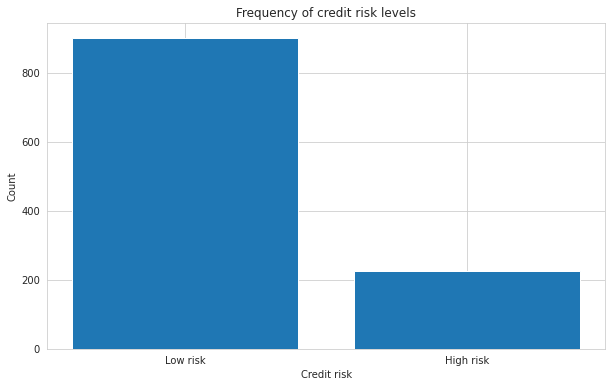

In [ ]:
#barras verticales

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

#contar la frecuencia de los valores de la columna label
label_counts = customer_data['label'].value_counts()

#crear el gráfico de barras
plt.bar(label_counts.index, label_counts.values)

#estilo
plt.xlabel('Credit risk')
plt.ylabel('Count')
plt.title('Frequency of credit risk levels')
plt.xticks([0,1], ['Low risk', 'High risk'])

plt.show()

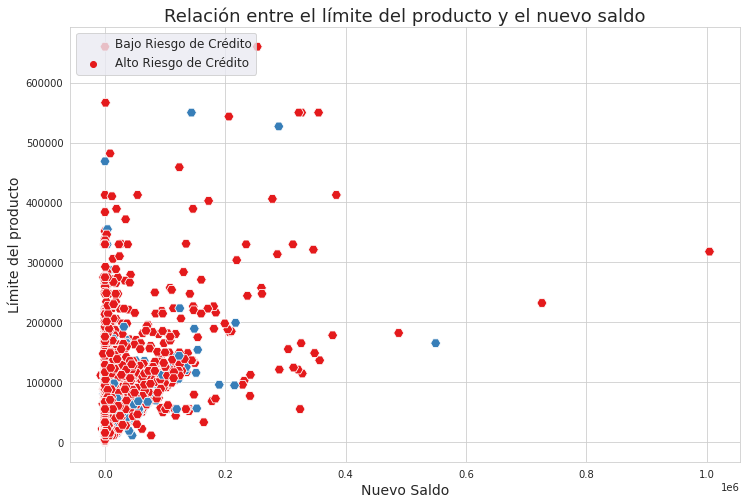

In [ ]:
#diagrama de dipersion

#DataFrame para el gráfico
merged_data = pd.merge(customer_data, payment_data, on='id')
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='new_balance', y='prod_limit', data=merged_data, hue='label', style='prod_code', s=100, ax=ax, palette='Set1')

#estilo
sns.set_style("darkgrid")
ax.set_title('Relación entre el límite del producto y el nuevo saldo', fontsize=18)
ax.set_xlabel('Nuevo Saldo', fontsize=14)
ax.set_ylabel('Límite del producto', fontsize=14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Bajo Riesgo de Crédito', 'Alto Riesgo de Crédito'], loc='upper left', fontsize=12)

plt.show()

In [ ]:
#grafico de cajones

#gráfico de cajones con los datos de fea_1 y fea_3, segmentados por label
sns.catplot(x="label", y="fea_1", hue="fea_3", kind="box", data=merged_data, 
            palette="husl", dodge=True, height=6, aspect=1.2)

#estilo
sns.set(style="whitegrid")
plt.title("Distribución de fea_1 y fea_3 por nivel de riesgo crediticio", fontsize=14, fontweight='bold')
plt.xlabel("Nivel de riesgo crediticio", fontsize=12)
plt.ylabel("Valor de fea_1", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

In [ ]:
#mapa de calor

fig, ax = plt.subplots(figsize=(10, 8))
corr_matrix = merged_data[["OVD_t1", "OVD_t2", "OVD_t3", "OVD_sum", "pay_normal", "new_balance"]].corr()
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

#estilo
sns.set(style="white")
plt.title("Correlación entre variables")
plt.xlabel("Variables")
plt.ylabel("Variables")

plt.show()

NameError: ignored